<a href="https://colab.research.google.com/github/2002hk/2002hk/blob/main/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### Gradient Descent code from scratch for one input col and one output col
- I am using dataset from sckitlearn.
- I am going to make class called MyGrd where i am going to pass a parametrised constructor passing learnig rate and slope as the input parameter
- The concept is to find the value of slope and intercept for which the value of loss function is minimum.
- It is done by partially differentiating the loss function once wrt slope and once wrt to intercept
- the formula for calulating the intercept and slope is:

  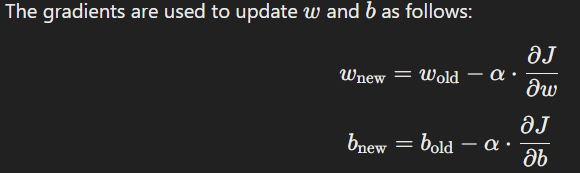


In [ ]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

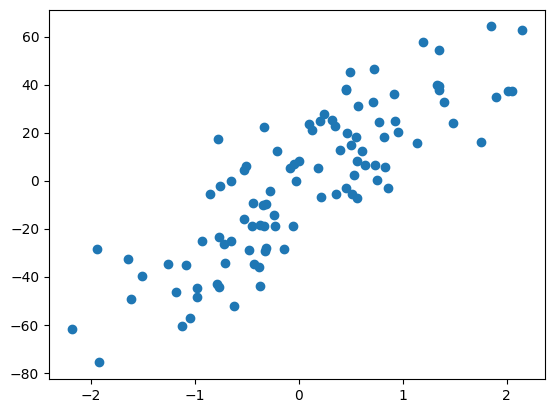

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
class MyGdReggresor:
  def __init__(self,learning_rate,epochs):
    self.lr=learning_rate
    self.m=100
    self.b=-120
    self.epochs=epochs
  def fit(self,x,y):
    for i in range(self.epochs):
      loss_slope_b=-2*np.sum(y-self.m*x.ravel()-self.b)
      loss_slope_m=-2*np.sum((y-self.m*x.ravel())-self.b*x.ravel())
      self.b=self.b-(self.lr*(loss_slope_b))
      self.m=self.m-(self.lr*loss_slope_m)
    print(self.m,self.b)

  def predict(self,x):
      return self.m*x+self.b



In [ ]:
gd=MyGdReggresor(0.001,140)


In [ ]:
gd.fit(x_train,y_train)

25.04315274041822 -2.2214012190306454


In [ ]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6391343622511545

#### Stochastic gradient desecnt code from scratch


In [ ]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)
(442, 10)
(442,)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

(442, 10)
(442,)


In [ ]:
X_train.shape

(353, 10)

In [ ]:
class SGDRegressor:
  def __init__(self,learning_rate=0.1,epochs=100):
    self.coef=None
    self.intercept=None
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self,x_train,y_train):
    self.intercept=0
    self.coef=np.ones(x_train.shape[1])

    for i in range(self.epochs):
      for j in range(X_train.shape[0]):
        #selecting a random index of a row, jitne rows honge utni baar ek epoch mai values of intercept and coeff update hoga
        idx=np.random.randint(0,X_train.shape[0])
        #calculating y_hat
        y_hat=np.dot(x_train[idx],self.coef)+self.intercept

        #calculating intercept ka derivative
        intercept_der=-2*(y_train[idx]-y_hat)
        self.intercept=self.intercept-(self.lr*intercept_der)

        #calculating coeff ka derivative
        coef_der=-2*np.dot((y_train[idx]-y_hat),X_train[idx])
        self.coef=self.coef-(self.lr*coef_der)
    print(self.coef,self.intercept)

  def predict(self,X_test):
    return np.dot(X_test,self.coef) + self.intercept

In [ ]:
sgd = SGDRegressor(learning_rate=0.01,epochs=55)

In [ ]:
sgd.fit(X_train,y_train)

[  58.72912752  -77.85319863  359.96772637  258.22534554    8.45742681
  -41.65966534 -179.62197801  128.21819991  334.00437663  124.56361105] 157.70917465303444


In [ ]:
y_pred = sgd.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.4324748480466033

#### Mini-Batch Gradient descent code from scratch.

In [ ]:
import random

In [ ]:
class MBGDRegressor:

    def __init__(self,batch_size,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            for j in range(int(X_train.shape[0]/self.batch_size)):

                idx = random.sample(range(X_train.shape[0]),self.batch_size)

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_









In [ ]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)

In [ ]:
mbr.fit(X_train,y_train)

154.73095213754362 [  27.46085441 -147.57872087  454.77322918  307.58105103  -19.8549113
  -90.92408269 -188.39187789  109.98581612  411.25792149  108.13102524]


In [ ]:
y_pred = mbr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.4528914931223089